In [2]:
mydata <- read.csv('educational service long.csv', header = TRUE) #educational service long.csv
head(mydata,15)

,custid,startlen,time,payleft,lagtest,cancelnow
,<int>,<int>,<int>,<int>,<int>,<int>
1,137,6,1,5,4,0
2,137,6,2,4,4,0
3,137,6,3,3,4,0
4,137,6,4,2,4,0
5,137,6,5,1,4,0
6,137,6,6,0,4,0
7,137,6,7,5,0,0
8,137,6,8,4,4,0
9,137,6,9,3,4,0


# PART 1

## Survival and Hazard function/visualization aggregated

In [3]:
#Survival/Hazard chart
customers.remaining <- aggregate(mydata$cancelnow, by = list(mydata$time), FUN = length)
colnames(customers.remaining)<-c("time","customers")
last_row <- c(12 , nrow(mydata[mydata$time == 11 & mydata$cancelnow == 0, ]) )
customers.remaining <- rbind(customers.remaining, last_row)

row.names(customers.remaining) <- seq_along(customers.remaining[,1])-1
customers.remaining$time <- customers.remaining$time - 1

customers.remaining

,time,customers
,<dbl>,<dbl>
0,0,4721
1,1,4693
2,2,4592
3,3,4396
4,4,4260
5,5,4115
6,6,3614
7,7,3422
8,8,3294


In [4]:
customers.defected <- as.data.frame(table(mydata$time, mydata$cancelnow)[,2])
first_row <- 0
customers.defected <- rbind(first_row,customers.defected)
colnames(customers.defected)<-c("defected")
row.names(customers.defected) <- seq_along(customers.defected[,1])-1
customers.defected

,defected
,<dbl>
0,0
1,28
2,101
3,196
4,136
5,145
6,501
7,192
8,128


In [5]:
survival.hazard <- cbind(customers.remaining,customers.defected)

In [6]:
survival.hazard

,time,customers,defected
,<dbl>,<dbl>,<dbl>
0,0,4721,0
1,1,4693,28
2,2,4592,101
3,3,4396,196
4,4,4260,136
5,5,4115,145
6,6,3614,501
7,7,3422,192
8,8,3294,128


In [7]:
survival.hazard$survival.rate <- survival.hazard$customers/survival.hazard[1,'customers']

#to calculate Hazard Rate (number of defected customers for current month divided by total customers of last month)
for (i in 2:12) {
  survival.hazard[i,'hazard.rate'] <- survival.hazard[i,'defected'] / survival.hazard[i-1,'customers']
}

survival.hazard

,time,customers,defected,survival.rate,hazard.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,4721,0,1.0000000,NA
1,1,4693,28,0.9940691,0.005930947
2,2,4592,101,0.9726753,0.021521415
3,3,4396,196,0.9311587,0.042682927
4,4,4260,136,0.9023512,0.030937216
5,5,4115,145,0.8716374,0.034037559
6,6,3614,501,0.7655158,0.121749696
7,7,3422,192,0.7248464,0.053126729
8,8,3294,128,0.6977335,0.037405026


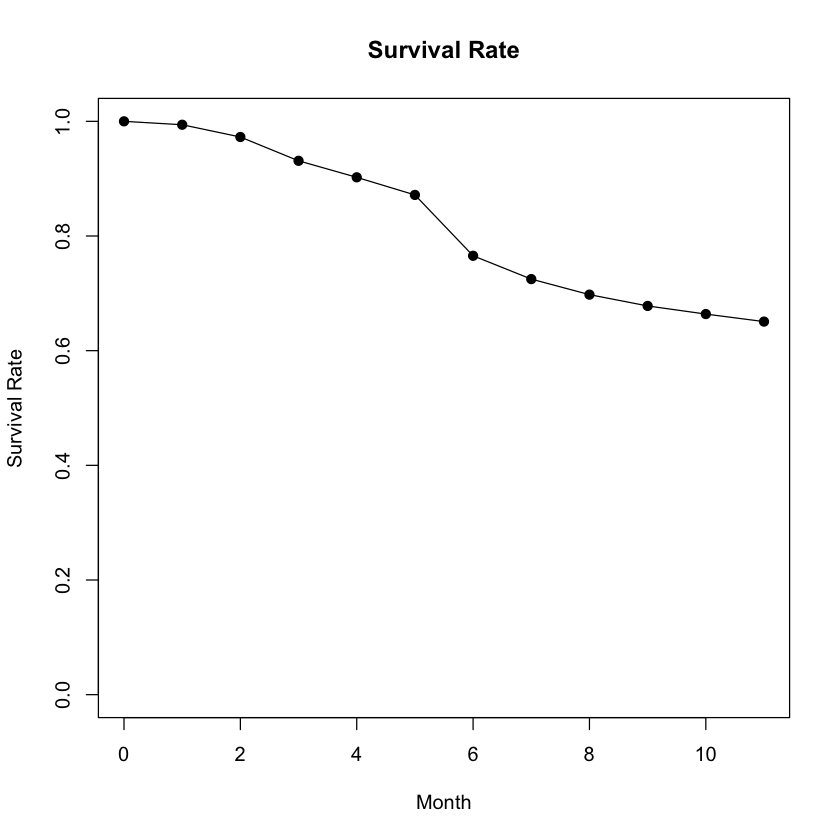

In [8]:
#Survival Rate
plot(survival.rate ~ time,data=survival.hazard, type='l', xlab = "Month", ylab = "Survival Rate", main = "Survival Rate",ylim=c(0,1))
points(survival.hazard$time, survival.hazard$survival.rate, pch = 19, col = "black")

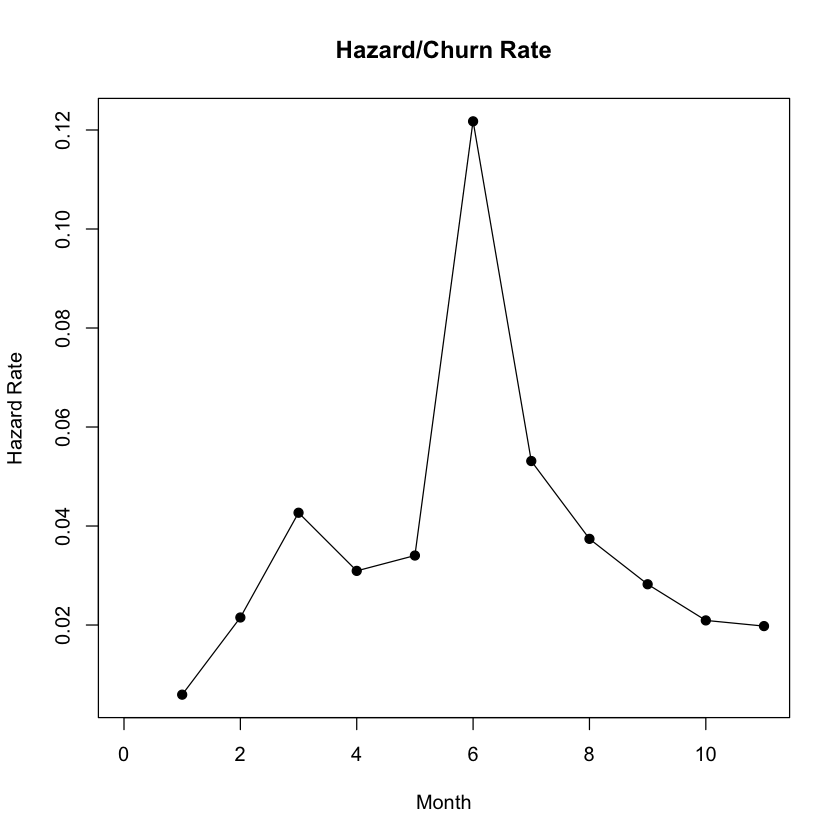

In [9]:
#Hazard Rate
plot(hazard.rate ~ time,data=survival.hazard, type='l', xlab = "Month", ylab = "Hazard Rate", main = "Hazard/Churn Rate")
points(survival.hazard$time, survival.hazard$hazard.rate, pch = 19, col = "black")

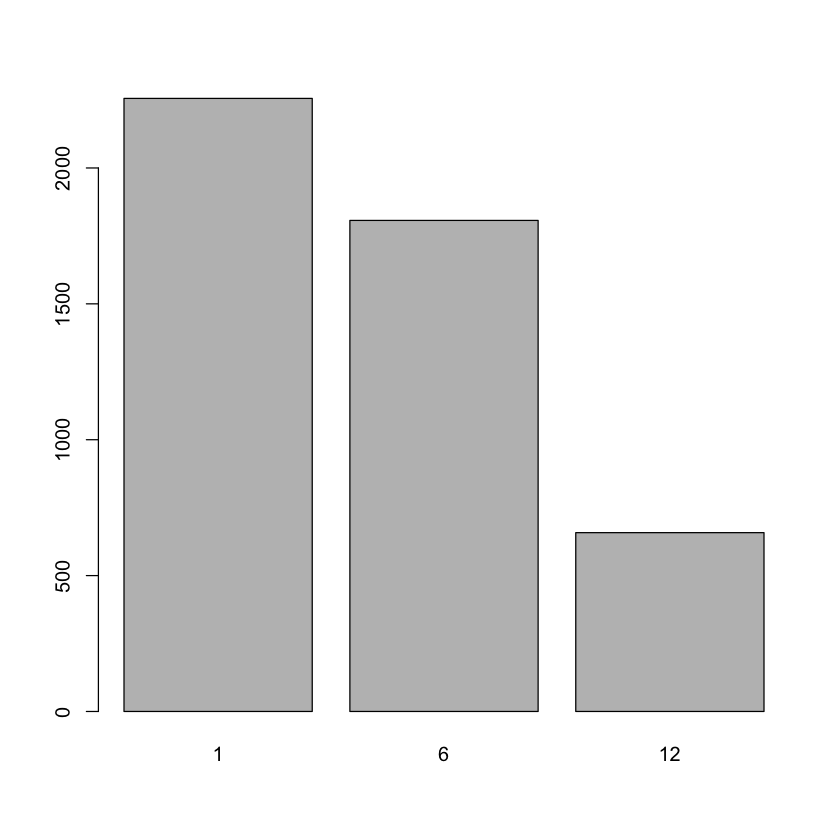

In [10]:
#Distribution of contracts

s<- data.frame(aggregate(mydata$custid, by = list(mydata$startlen), FUN = function(x) length(unique(x))))
barplot(s$x, names.arg = s$Group.1)

In [11]:
###################################################################################################################################################
mydata.1 <- mydata[mydata$startlen == 1, ]
mydata.1.customers <- length(unique(mydata.1$custid))
mydata.6 <- mydata[mydata$startlen == 6, ]
mydata.6.customers <- length(unique(mydata.6$custid))
mydata.12 <- mydata[mydata$startlen == 12, ]
mydata.12.customers <- length(unique(mydata.12$custid))
###################################################################################################################################################

### Survival and Hazard function/visualization for 1-month contract

In [12]:
###################################################################################################################################################
customers.remaining.1 <- aggregate(mydata.1$cancelnow, by = list(mydata.1$time), FUN = length)
colnames(customers.remaining.1)<-c("time","customers")
last_row <- c(12 , nrow(mydata.1[mydata.1$time == 11 & mydata.1$cancelnow == 0, ]) )
customers.remaining.1 <- rbind(customers.remaining.1, last_row)
row.names(customers.remaining.1) <- seq_along(customers.remaining.1[,1])-1
customers.remaining.1$time <- customers.remaining.1$time - 1



customers.defected.1 <- as.data.frame(table(mydata.1$time, mydata.1$cancelnow)[,2])
first_row <- 0
customers.defected.1 <- rbind(first_row,customers.defected.1)
colnames(customers.defected.1)<-c("defected")
row.names(customers.defected.1) <- seq_along(customers.defected.1[,1])-1


survival.hazard.1 <- cbind(customers.remaining.1,customers.defected.1)


survival.hazard.1$survival.rate <- survival.hazard.1$customers/mydata.1.customers

for (i in 2:12) {
  survival.hazard.1[i,'hazard.rate'] <- survival.hazard.1[i,'defected'] / survival.hazard.1[i-1,'customers']
}
survival.hazard.1 <- survival.hazard.1

survival.hazard.1

,time,customers,defected,survival.rate,hazard.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,2256,0,1.0000000,NA
1,1,2236,20,0.9911348,0.008865248
2,2,2160,76,0.9574468,0.033989267
3,3,2003,157,0.8878546,0.072685185
4,4,1895,108,0.8399823,0.053919121
5,5,1767,128,0.7832447,0.067546174
6,6,1629,138,0.7220745,0.078098472
7,7,1499,130,0.6644504,0.079803560
8,8,1400,99,0.6205674,0.066044029


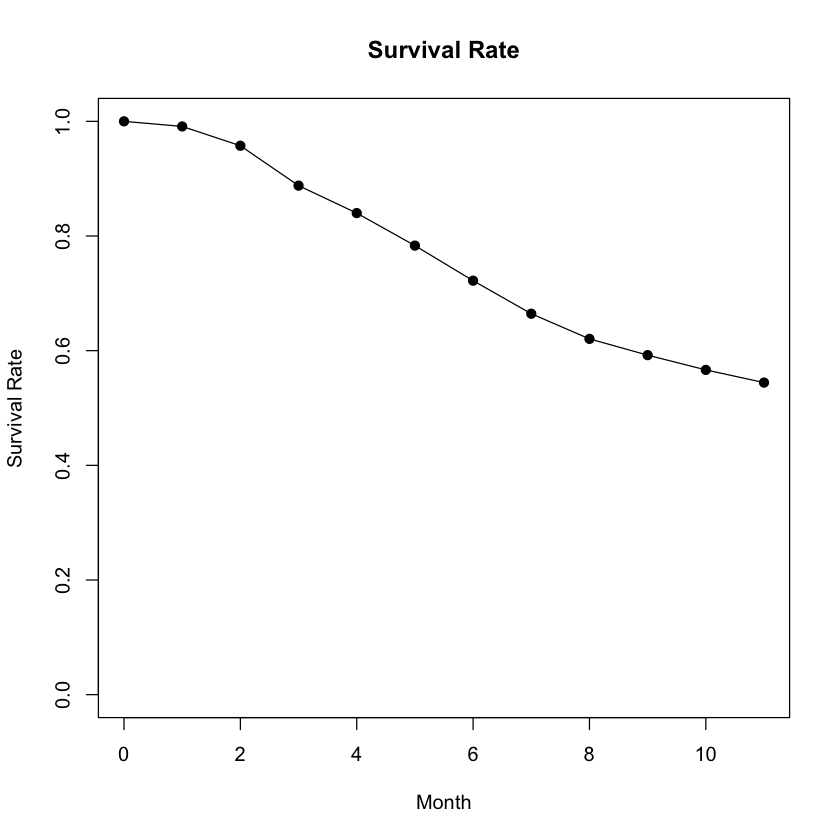

In [13]:
#Survival Rate
plot(survival.rate ~ time,data=survival.hazard.1, type='l', xlab = "Month", ylab = "Survival Rate", main = "Survival Rate",ylim=c(0,1))
points(survival.hazard.1$time, survival.hazard.1$survival.rate, pch = 19, col = "black")

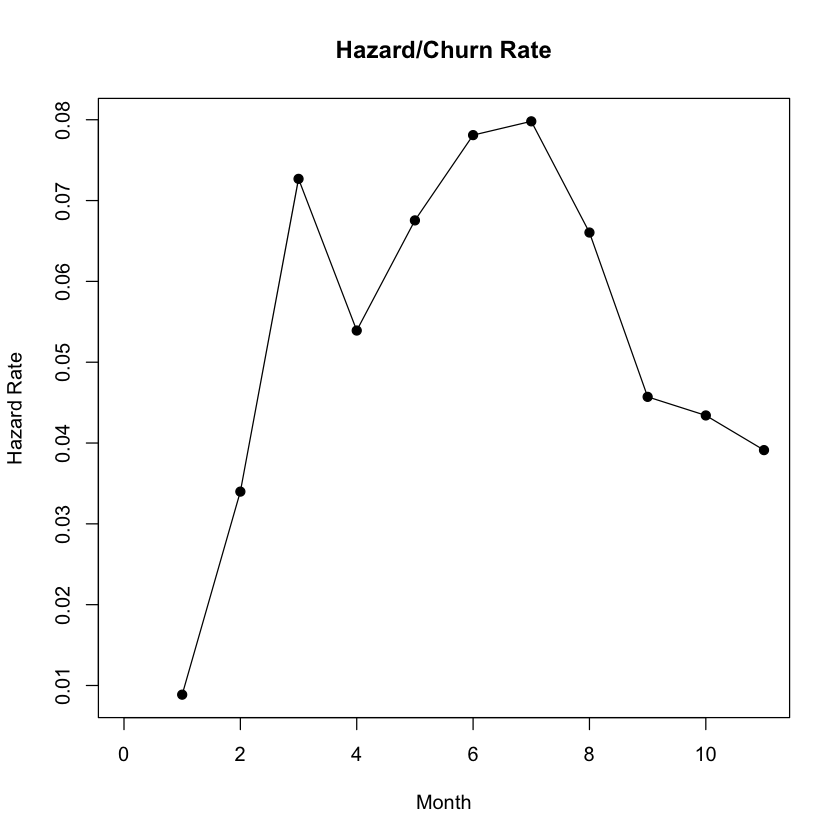

In [14]:
#Hazard Rate
plot(hazard.rate ~ time,data=survival.hazard.1, type='l', xlab = "Month", ylab = "Hazard Rate", main = "Hazard/Churn Rate")
points(survival.hazard.1$time, survival.hazard.1$hazard.rate, pch = 19, col = "black")

### Survival and Hazard function/visualization for 6-month contract

In [15]:
###################################################################################################################################################
customers.remaining.6 <- aggregate(mydata.6$cancelnow, by = list(mydata.6$time), FUN = length)
colnames(customers.remaining.6)<-c("time","customers")
last_row <- c(12 , nrow(mydata.6[mydata.6$time == 11 & mydata.6$cancelnow == 0, ]) )
customers.remaining.6 <- rbind(customers.remaining.6, last_row)
row.names(customers.remaining.6) <- seq_along(customers.remaining.6[,1])-1
customers.remaining.6$time <- customers.remaining.6$time - 1



customers.defected.6 <- as.data.frame(table(mydata.6$time, mydata.6$cancelnow)[,2])
first_row <- 0
customers.defected.6 <- rbind(first_row,customers.defected.6)
colnames(customers.defected.6)<-c("defected")
row.names(customers.defected.6) <- seq_along(customers.defected.6[,1])-1


survival.hazard.6 <- cbind(customers.remaining.6,customers.defected.6)


survival.hazard.6$survival.rate <- survival.hazard.6$customers/mydata.6.customers

for (i in 2:12) {
  survival.hazard.6[i,'hazard.rate'] <- survival.hazard.6[i,'defected'] / survival.hazard.6[i-1,'customers']
}
survival.hazard.6 <- survival.hazard.6

survival.hazard.6

,time,customers,defected,survival.rate,hazard.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,1807,0,1.0000000,NA
1,1,1804,3,0.9983398,0.001660210
2,2,1786,18,0.9883785,0.009977827
3,3,1758,28,0.9728832,0.015677492
4,4,1735,23,0.9601550,0.013083049
5,5,1720,15,0.9518539,0.008645533
6,6,1363,357,0.7542889,0.207558140
7,7,1312,51,0.7260653,0.037417461
8,8,1287,25,0.7122302,0.019054878


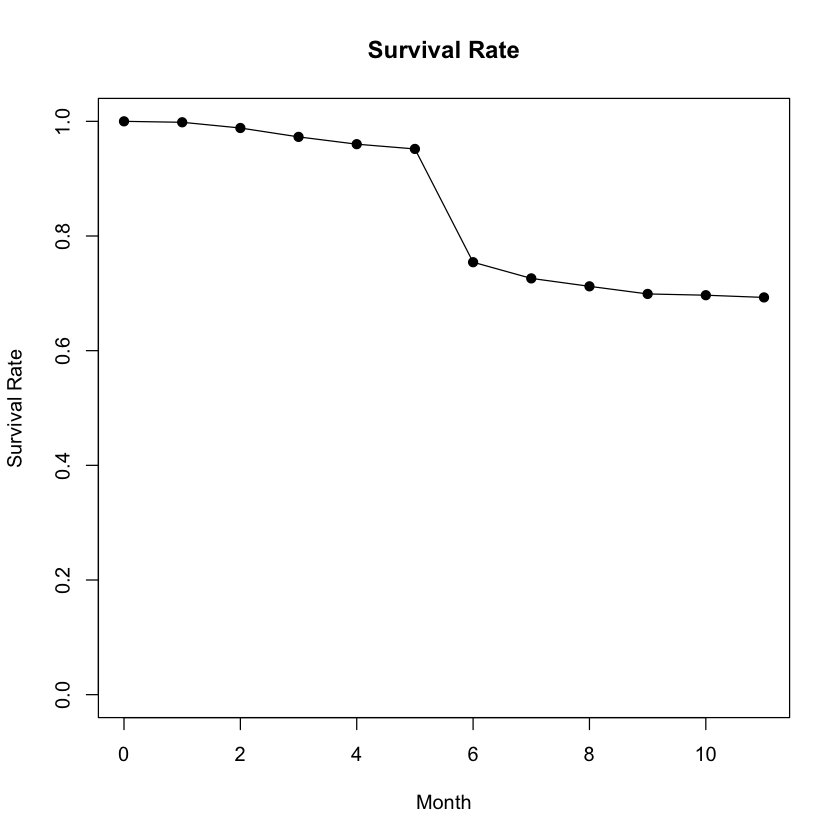

In [16]:
#Survival Rate
plot(survival.rate ~ time,data=survival.hazard.6, type='l', xlab = "Month", ylab = "Survival Rate", main = "Survival Rate",ylim=c(0,1))
points(survival.hazard.6$time, survival.hazard.6$survival.rate, pch = 19, col = "black")

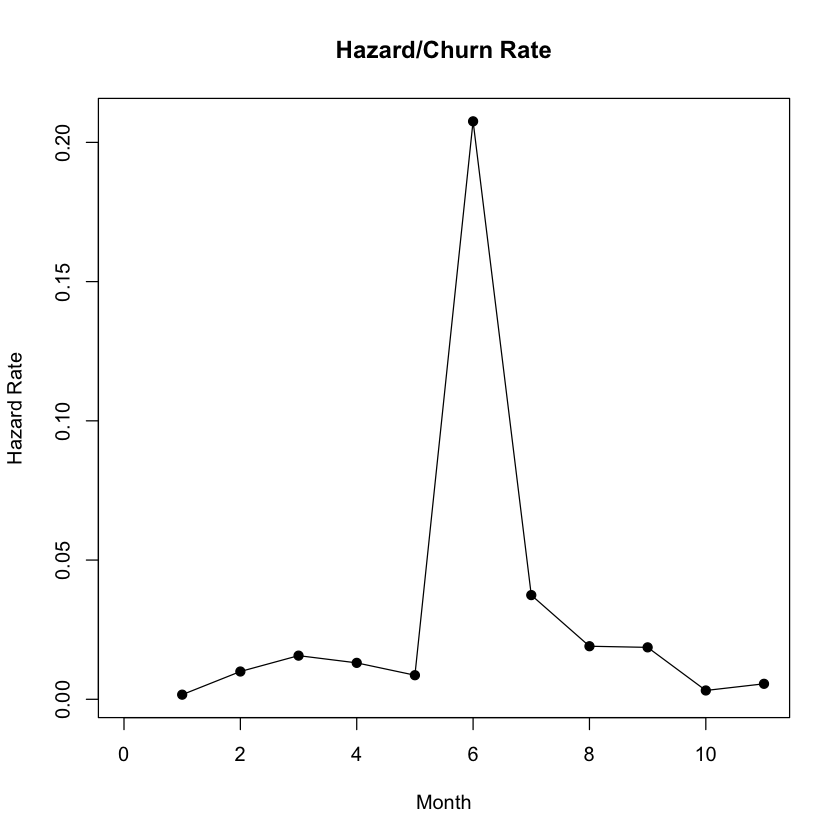

In [17]:
#Hazard Rate
plot(hazard.rate ~ time,data=survival.hazard.6, type='l', xlab = "Month", ylab = "Hazard Rate", main = "Hazard/Churn Rate")
points(survival.hazard.6$time, survival.hazard.6$hazard.rate, pch = 19, col = "black")

### Survival and Hazard function/visualization for 12-month contract

In [18]:
###################################################################################################################################################
customers.remaining.12 <- aggregate(mydata.12$cancelnow, by = list(mydata.12$time), FUN = length)
colnames(customers.remaining.12)<-c("time","customers")
last_row <- c(12 , nrow(mydata.12[mydata.12$time == 11 & mydata.12$cancelnow == 0, ]) )
customers.remaining.12 <- rbind(customers.remaining.12, last_row)
row.names(customers.remaining.12) <- seq_along(customers.remaining.12[,1])-1
customers.remaining.12$time <- customers.remaining.12$time - 1



customers.defected.12 <- as.data.frame(table(mydata.12$time, mydata.12$cancelnow)[,2])
first_row <- 0
customers.defected.12 <- rbind(first_row,customers.defected.12)
colnames(customers.defected.12)<-c("defected")
row.names(customers.defected.12) <- seq_along(customers.defected.12[,1])-1


survival.hazard.12 <- cbind(customers.remaining.12,customers.defected.12)

survival.hazard.12$survival.rate <- survival.hazard.12$customers/mydata.12.customers
for (i in 2:12) {
  survival.hazard.12[i,'hazard.rate'] <- survival.hazard.12[i,'defected'] / survival.hazard.12[i-1,'customers']
}
survival.hazard.12 <- survival.hazard.12
survival.hazard.12

,time,customers,defected,survival.rate,hazard.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,658,0,1.0000000,NA
1,1,653,5,0.9924012,0.007598784
2,2,646,7,0.9817629,0.010719755
3,3,635,11,0.9650456,0.017027864
4,4,630,5,0.9574468,0.007874016
5,5,628,2,0.9544073,0.003174603
6,6,622,6,0.9452888,0.009554140
7,7,611,11,0.9285714,0.017684887
8,8,607,4,0.9224924,0.006546645


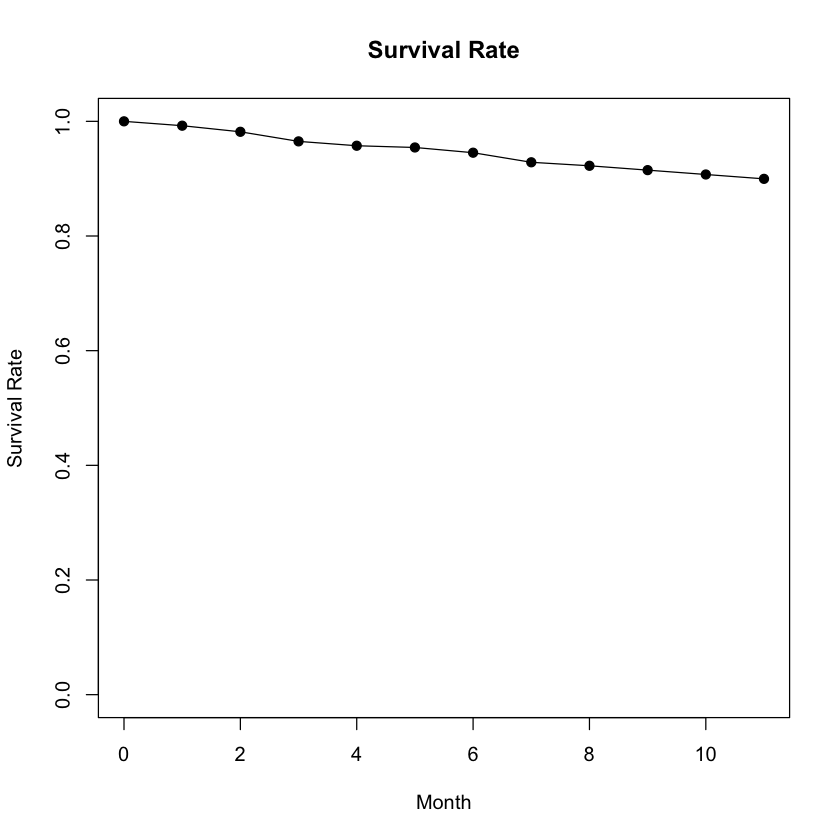

In [19]:
#Survival Rate
plot(survival.rate ~ time,data=survival.hazard.12, type='l', xlab = "Month", ylab = "Survival Rate", main = "Survival Rate",ylim=c(0,1))
points(survival.hazard.12$time, survival.hazard.12$survival.rate, pch = 19, col = "black")

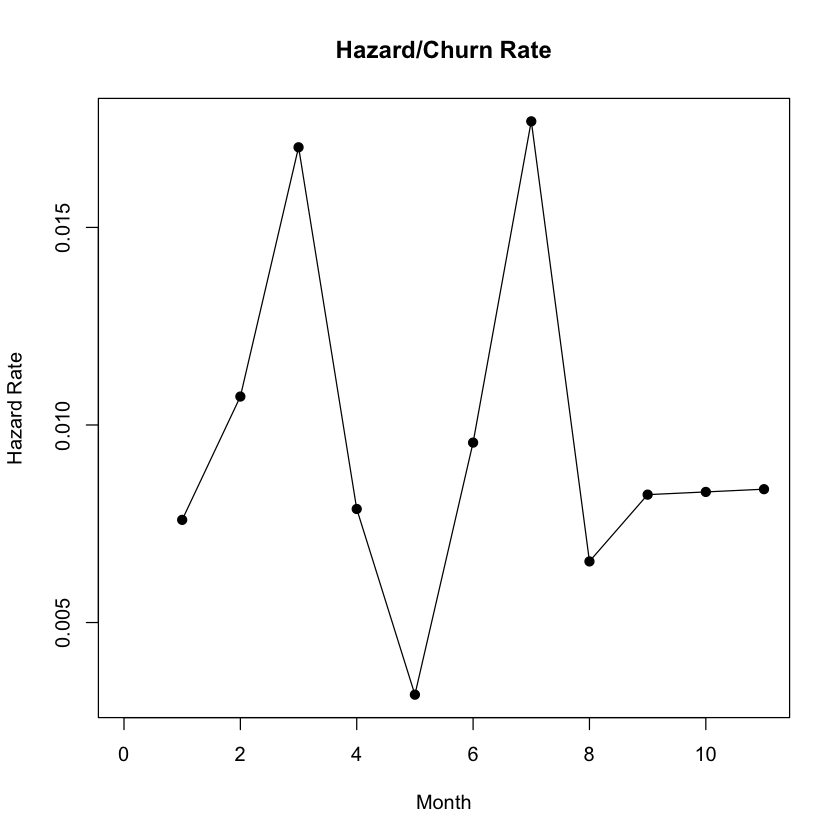

In [20]:
#Hazard Rate
plot(hazard.rate ~ time,data=survival.hazard.12, type='l', xlab = "Month", ylab = "Hazard Rate", main = "Hazard/Churn Rate")
points(survival.hazard.12$time, survival.hazard.12$hazard.rate, pch = 19, col = "black")

## 1-month to 12-month contract conversion cost

In [21]:
survival.hazard.1

,time,customers,defected,survival.rate,hazard.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,2256,0,1.0000000,NA
1,1,2236,20,0.9911348,0.008865248
2,2,2160,76,0.9574468,0.033989267
3,3,2003,157,0.8878546,0.072685185
4,4,1895,108,0.8399823,0.053919121
5,5,1767,128,0.7832447,0.067546174
6,6,1629,138,0.7220745,0.078098472
7,7,1499,130,0.6644504,0.079803560
8,8,1400,99,0.6205674,0.066044029


In [22]:
###################################################################################################################################################
          # CLV Calculation
###################################################################################################################################################

# survival.hazard.1$survival.rate <- 
#   
survival.hazard.1$clv.1 <- (5*survival.hazard.1$survival.rate) / ((1.1)^(survival.hazard.1$time)); sum(survival.hazard.1$clv.1)
survival.hazard.6$clv.6 <- (5*survival.hazard.6$survival.rate) / ((1.1)^(survival.hazard.6$time)); sum(survival.hazard.6$clv.6)
survival.hazard.12$clv.12 <- (5*survival.hazard.12$survival.rate) / ((1.1)^(survival.hazard.12$time)); sum(survival.hazard.12$clv.12)

#maximum amount we can 
sum(survival.hazard.12$clv.12) - sum(survival.hazard.1$clv.1)

[1] 30.5891

[1] 33.2035

[1] 35.8938

[1] 5.304698

In [23]:
survival.hazard.12

,time,customers,defected,survival.rate,hazard.rate,clv.12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,658,0,1.0000000,NA,5.000000
1,1,653,5,0.9924012,0.007598784,4.510915
2,2,646,7,0.9817629,0.010719755,4.056872
3,3,635,11,0.9650456,0.017027864,3.625265
4,4,630,5,0.9574468,0.007874016,3.269745
5,5,628,2,0.9544073,0.003174603,2.963059
6,6,622,6,0.9452888,0.009554140,2.667954
7,7,611,11,0.9285714,0.017684887,2.382520
8,8,607,4,0.9224924,0.006546645,2.151748


# PART 2

## Trigger variables

In [24]:
###################################################################################################################################################
# PART 2 #######################################################################################################################################
###################################################################################################################################################

mydata$lagnotest <- ifelse(mydata$lagtest == 0, 1, 0)

mydata <- mydata[order(mydata$custid, mydata$time), ]

mydata <- mydata %>%
  group_by(custid) %>%
  mutate(cumlagtest = cumsum(lagtest))
mydata <- as.data.frame(mydata)




mydata$contractup <- ifelse(mydata$payleft == 0, 1, 0)

mydata$lagnotest <- as.factor(mydata$lagnotest)
mydata$startlen <- as.factor(mydata$startlen)
#mydata$time <- as.factor(mydata$time)
mydata$contractup <- as.factor(mydata$contractup)

str(mydata)

head(mydata)

'data.frame':	43442 obs. of  9 variables:
 $ custid    : int  137 137 137 137 137 137 137 137 137 137 ...
 $ startlen  : Factor w/ 3 levels "1","6","12": 2 2 2 2 2 2 2 2 2 2 ...
 $ time      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ payleft   : int  5 4 3 2 1 0 5 4 3 2 ...
 $ lagtest   : int  4 4 4 4 4 4 0 4 4 4 ...
 $ cancelnow : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lagnotest : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 1 1 ...
 $ cumlagtest: int  4 8 12 16 20 24 24 28 32 36 ...
 $ contractup: Factor w/ 2 levels "0","1": 1 1 1 1 1 2 1 1 1 1 ...


,custid,startlen,time,payleft,lagtest,cancelnow,lagnotest,cumlagtest,contractup
,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>
1,137,6,1,5,4,0,0,4,0
2,137,6,2,4,4,0,0,8,0
3,137,6,3,3,4,0,0,12,0
4,137,6,4,2,4,0,0,16,0
5,137,6,5,1,4,0,0,20,0
6,137,6,6,0,4,0,0,24,1


## Fit and test aggregate models

In [25]:
#Full Model
model.full <- glm(cancelnow ~ startlen + time + payleft + lagnotest + cumlagtest + contractup, data = mydata, family =binomial(link = "logit"))
summary(model.full)

#Null Model to compare other logistic models
model.null <- glm(cancelnow ~ 1, data = mydata, family =binomial(link = "logit"))

#Is the trigger lagnotest significant to predict churn rate?
model.no.lagnotest <- glm(cancelnow ~ startlen + time + payleft + cumlagtest + contractup, data = mydata, family =binomial(link = "logit"))
anova(model.no.lagnotest,model.full,test="Chi")

#Is the trigger cumlagtest significant to predict churn rate?
model.no.cumlagtest <- glm(cancelnow ~ startlen + time + payleft + lagnotest + contractup, data = mydata, family =binomial(link = "logit"))
anova(model.no.cumlagtest,model.full,test="Chi")

#Is the trigger contractup significant to predict churn rate?
model.no.contractup <- glm(cancelnow ~ startlen + time + payleft + lagnotest + cumlagtest, data = mydata, family =binomial(link = "logit"))
anova(model.no.contractup,model.full,test="Chi")


Call:
glm(formula = cancelnow ~ startlen + time + payleft + lagnotest + 
    cumlagtest + contractup, family = binomial(link = "logit"), 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2787  -0.2451  -0.0952  -0.0557   4.1513  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.911587   0.201568 -44.211  < 2e-16 ***
startlen6    1.753640   0.078098  22.454  < 2e-16 ***
startlen12   0.822518   0.206064   3.992 6.56e-05 ***
time         0.075629   0.011790   6.415 1.41e-10 ***
payleft      0.222699   0.033150   6.718 1.84e-11 ***
lagnotest1   3.095998   0.112531  27.512  < 2e-16 ***
cumlagtest  -0.025179   0.003778  -6.664 2.66e-11 ***
contractup1  3.666469   0.146833  24.970  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14023  on 43441  degrees of freedom
Residual deviance: 10015  on 43434  degrees of

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43435,11125.68,NA,NA,NA
2,43434,10014.52,1,1111.16,1.239603e-243


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43435,10059.91,NA,NA,NA
2,43434,10014.52,1,45.3883,1.615972e-11


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43435,10770.83,NA,NA,NA
2,43434,10014.52,1,756.3105,1.703279e-166


In [26]:
# to change column name: colnames(mydata)[colnames(mydata) == "cumsum_value"] <- "cumlagtest"

#Final Model
model.final <- glm(cancelnow ~ startlen + time + lagnotest + cumlagtest + contractup , data = mydata, family =binomial(link = "logit"))
summary(model.final)

model.final.nolagnotest <- glm(cancelnow ~ startlen + time + cumlagtest + contractup, data = mydata, family =binomial(link = "logit"))
summary(model.final.nolagnotest)
anova(model.final,model.final.nolagnotest, test="Chi") 

model.final.nocumlagtest <- glm(cancelnow ~ startlen + time + lagnotest + contractup, data = mydata, family =binomial(link = "logit"))
summary(model.final.nocumlagtest)
anova(model.final,model.final.nocumlagtest, test="Chi") 

model.final.nocontractup <- glm(cancelnow ~ startlen + time + lagnotest + cumlagtest, data = mydata, family =binomial(link = "logit"))
summary(model.final.nocontractup)
anova(model.final,model.final.nocontractup, test="Chi") 




Call:
glm(formula = cancelnow ~ startlen + time + lagnotest + cumlagtest + 
    contractup, family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2379  -0.2669  -0.0961  -0.0528   4.1448  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.116035   0.158230 -51.293  < 2e-16 ***
startlen6    1.757459   0.078150  22.488  < 2e-16 ***
startlen12   1.524259   0.164927   9.242  < 2e-16 ***
time         0.057411   0.011481   5.001 5.71e-07 ***
lagnotest1   3.070320   0.112565  27.276  < 2e-16 ***
cumlagtest  -0.025113   0.003765  -6.669 2.57e-11 ***
contractup1  2.998774   0.101106  29.660  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14023  on 43441  degrees of freedom
Residual deviance: 10060  on 43435  degrees of freedom
AIC: 10074

Number of Fisher Scoring iterations: 8



Call:
glm(formula = cancelnow ~ startlen + time + cumlagtest + contractup, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3626  -0.2677  -0.1575  -0.1056   4.0449  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.981102   0.112334 -53.244   <2e-16 ***
startlen6    1.750528   0.074269  23.570   <2e-16 ***
startlen12   1.395170   0.162933   8.563   <2e-16 ***
time         0.223207   0.009492  23.516   <2e-16 ***
cumlagtest  -0.105786   0.003062 -34.545   <2e-16 ***
contractup1  3.047006   0.098025  31.084   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14023  on 43441  degrees of freedom
Residual deviance: 11152  on 43436  degrees of freedom
AIC: 11164

Number of Fisher Scoring iterations: 7


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43435,10060.26,NA,NA,NA
2,43436,11151.78,-1,-1091.524,2.296841e-239



Call:
glm(formula = cancelnow ~ startlen + time + lagnotest + contractup, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1424  -0.2788  -0.0977  -0.0519   4.0660  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.390180   0.154878 -54.173   <2e-16 ***
startlen6    1.737716   0.077654  22.378   <2e-16 ***
startlen12   1.536230   0.164596   9.333   <2e-16 ***
time         0.013786   0.009774   1.410    0.158    
lagnotest1   3.410838   0.100579  33.912   <2e-16 ***
contractup1  3.007015   0.100805  29.830   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14023  on 43441  degrees of freedom
Residual deviance: 10106  on 43436  degrees of freedom
AIC: 10118

Number of Fisher Scoring iterations: 8


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43435,10060.26,NA,NA,NA
2,43436,10105.74,-1,-45.48258,1.540024e-11



Call:
glm(formula = cancelnow ~ startlen + time + lagnotest + cumlagtest, 
    family = binomial(link = "logit"), data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6694  -0.3883  -0.0953  -0.0837   3.7558  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.122528   0.113216 -45.246  < 2e-16 ***
startlen6   -0.281428   0.055909  -5.034 4.81e-07 ***
startlen12  -1.474497   0.129933 -11.348  < 2e-16 ***
time         0.063591   0.010586   6.007 1.89e-09 ***
lagnotest1   3.041314   0.109753  27.711  < 2e-16 ***
cumlagtest  -0.026240   0.003539  -7.415 1.22e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 14023  on 43441  degrees of freedom
Residual deviance: 10981  on 43436  degrees of freedom
AIC: 10993

Number of Fisher Scoring iterations: 8


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43435,10060.26,NA,NA,NA
2,43436,10980.85,-1,-920.5952,3.271319e-202


## Fit prediction for aggregate model/data

In [27]:

mydata$model.final.prediction <- predict(model.final, data=mydata, type="response")
head(mydata)

,custid,startlen,time,payleft,lagtest,cancelnow,lagnotest,cumlagtest,contractup,model.final.prediction
,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>
1,137,6,1,5,4,0,0,4,0,0.001656124
2,137,6,2,4,4,0,0,8,0,0.001586465
3,137,6,3,3,4,0,0,12,0,0.001519731
4,137,6,4,2,4,0,0,16,0,0.001455801
5,137,6,5,1,4,0,0,20,0,0.001394556
6,137,6,6,0,4,0,0,24,1,0.026133645


## Predicted Hazard/Survival Rate

In [28]:
predict.defected <- aggregate(mydata$model.final.prediction,by=list(mydata$time), FUN = sum)
colnames(predict.defected) <- c('time','predict.defected')
predict.defected.0 <- data.frame(time = 0, predict.defected = 0)
predict.defected  <- rbind(predict.defected.0,predict.defected )

survival.hazard <- cbind(survival.hazard, predict.defected[2])
survival.hazard$predict.survived[1] <- survival.hazard$customers[1]

for (i in 2:12) {
survival.hazard[i,'predict.survived'] <- survival.hazard[i-1,'predict.survived'] - survival.hazard[i,'predict.defected'] 
survival.hazard[i,'predicted.hazard.rate'] <- survival.hazard[i,'predict.defected'] / survival.hazard[i-1,'predict.survived'] 

} 

survival.hazard$predicted.survival.rate <- survival.hazard[,'predict.survived']/survival.hazard[1,'predict.survived'] 

survival.hazard

,time,customers,defected,survival.rate,hazard.rate,predict.defected,predict.survived,predicted.hazard.rate,predicted.survival.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,4721,0,1.0000000,NA,0.00000,4721.000,NA,1.0000000
1,1,4693,28,0.9940691,0.005930947,96.90860,4624.091,0.02052713,0.9794729
2,2,4592,101,0.9726753,0.021521415,122.80323,4501.288,0.02655727,0.9534607
3,3,4396,196,0.9311587,0.042682927,131.79806,4369.490,0.02928008,0.9255433
4,4,4260,136,0.9023512,0.030937216,146.67285,4222.817,0.03356750,0.8944752
5,5,4115,145,0.8716374,0.034037559,151.40541,4071.412,0.03585412,0.8624045
6,6,3614,501,0.7655158,0.121749696,451.18454,3620.227,0.11081771,0.7668348
7,7,3422,192,0.7248464,0.053126729,125.92793,3494.299,0.03478454,0.7401609
8,8,3294,128,0.6977335,0.037405026,115.61536,3378.684,0.03308685,0.7156713


### Predicted Hazard/Survival Rate by Contract

In [29]:
aggregate(mydata$model.final.prediction,by=list(mydata$time,mydata$startlen), FUN = sum)

Group.1,Group.2,x
<int>,<fct>,<dbl>
1,1,79.474106
2,1,100.988727
3,1,106.866117
4,1,115.143239
5,1,116.153242
6,1,103.321785
7,1,97.519204
8,1,87.608932
9,1,81.918166


In [30]:
predict.defected.contract <- aggregate(mydata$model.final.prediction,by=list(mydata$time,mydata$startlen), FUN = sum)
colnames(predict.defected.contract) <- c('time','contract','predict.defected')

predict.defected.1 <- predict.defected.contract[1:11,c(1,3)]
predict.defected.1  <- rbind(predict.defected.0,predict.defected.1)

predict.defected.6 <- predict.defected.contract[12:22,c(1,3)]
predict.defected.6  <- rbind(predict.defected.0,predict.defected.6)

predict.defected.12 <- predict.defected.contract[23:33,c(1,3)]
predict.defected.12  <- rbind(predict.defected.0,predict.defected.12)

time,predict.defected
<dbl>,<dbl>
0,0.00000
1,79.47411
2,100.98873
3,106.86612
4,115.14324
5,116.15324
6,103.32178
7,97.51920
8,87.60893


,time,predict.defected
,<dbl>,<dbl>
1,0,0.00000
12,1,14.16008
13,2,17.91939
14,3,20.35106
15,4,25.78285
16,5,29.15867
17,6,341.93659
18,7,21.94308
19,8,20.89693


,time,predict.defected
,<dbl>,<dbl>
1,0,0.000000
23,1,3.274406
24,2,3.895109
25,3,4.580878
26,4,5.746758
27,5,6.093495
28,6,5.926163
29,7,6.465651
30,8,7.109498


In [31]:
#Survival/Hazard 1-month

survival.hazard.1 <- cbind(survival.hazard.1, predict.defected.1[2])
survival.hazard.1$predict.survived[1] <- survival.hazard.1$customers[1]

for (i in 2:12) {
survival.hazard.1[i,'predict.survived'] <- survival.hazard.1[i-1,'predict.survived'] - survival.hazard.1[i,'predict.defected'] 
survival.hazard.1[i,'predicted.hazard.rate'] <- survival.hazard.1[i,'predict.defected'] / survival.hazard.1[i-1,'predict.survived'] 
} 

survival.hazard.1$predicted.survival.rate <- survival.hazard.1[,'predict.survived']/survival.hazard.1[1,'predict.survived'] 

survival.hazard.1

#Survival/Hazard 6-month

survival.hazard.6 <- cbind(survival.hazard.6, predict.defected.6[2])
survival.hazard.6$predict.survived[1] <- survival.hazard.6$customers[1]

for (i in 2:12) {
survival.hazard.6[i,'predict.survived'] <- survival.hazard.6[i-1,'predict.survived'] - survival.hazard.6[i,'predict.defected'] 
survival.hazard.6[i,'predicted.hazard.rate'] <- survival.hazard.6[i,'predict.defected'] / survival.hazard.6[i-1,'predict.survived'] 
} 

survival.hazard.6$predicted.survival.rate <- survival.hazard.6[,'predict.survived']/survival.hazard.6[1,'predict.survived'] 

survival.hazard.6

#Survival/Hazard 12-month

survival.hazard.12 <- cbind(survival.hazard.12, predict.defected.12[2])
survival.hazard.12$predict.survived[1] <- survival.hazard.12$customers[1]

for (i in 2:12) {
survival.hazard.12[i,'predict.survived'] <- survival.hazard.12[i-1,'predict.survived'] - survival.hazard.12[i,'predict.defected'] 
survival.hazard.12[i,'predicted.hazard.rate'] <- survival.hazard.12[i,'predict.defected'] / survival.hazard.12[i-1,'predict.survived'] 
} 

survival.hazard.12$predicted.survival.rate <- survival.hazard.12[,'predict.survived']/survival.hazard.12[1,'predict.survived'] 

survival.hazard.12

,time,customers,defected,survival.rate,hazard.rate,clv.1,predict.defected,predict.survived,predicted.hazard.rate,predicted.survival.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,2256,0,1.0000000,NA,5.0000000,0.00000,2256.000,NA,1.0000000
1,1,2236,20,0.9911348,0.008865248,4.5051580,79.47411,2176.526,0.03522788,0.9647721
2,2,2160,76,0.9574468,0.033989267,3.9563918,100.98873,2075.537,0.04639905,0.9200076
3,3,2003,157,0.8878546,0.072685185,3.3352915,106.86612,1968.671,0.05148841,0.8726379
4,4,1895,108,0.8399823,0.053919121,2.8685960,115.14324,1853.528,0.05848780,0.8215992
5,5,1767,128,0.7832447,0.067546174,2.4316666,116.15324,1737.375,0.06266604,0.7701128
6,6,1629,138,0.7220745,0.078098472,2.0379611,103.32178,1634.053,0.05947007,0.7243142
7,7,1499,130,0.6644504,0.079803560,1.7048405,97.51920,1536.534,0.05967935,0.6810876
8,8,1400,99,0.6205674,0.066044029,1.4474963,87.60893,1448.925,0.05701726,0.6422538


,time,customers,defected,survival.rate,hazard.rate,clv.6,predict.defected,predict.survived,predicted.hazard.rate,predicted.survival.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,1807,0,1.0000000,NA,5.000000,0.00000,1807.000,NA,1.0000000
1,1,1804,3,0.9983398,0.001660210,4.537908,14.16008,1792.840,0.007836240,0.9921638
2,2,1786,18,0.9883785,0.009977827,4.084209,17.91939,1774.921,0.009994975,0.9822471
3,3,1758,28,0.9728832,0.015677492,3.654708,20.35106,1754.569,0.011465901,0.9709848
4,4,1735,23,0.9601550,0.013083049,3.278994,25.78285,1728.787,0.014694689,0.9567164
5,5,1720,15,0.9518539,0.008645533,2.955132,29.15867,1699.628,0.016866554,0.9405799
6,6,1363,357,0.7542889,0.207558140,2.128882,341.93659,1357.691,0.201183201,0.7513511
7,7,1312,51,0.7260653,0.037417461,1.862932,21.94308,1335.748,0.016162050,0.7392077
8,8,1287,25,0.7122302,0.019054878,1.661303,20.89693,1314.851,0.015644360,0.7276432


,time,customers,defected,survival.rate,hazard.rate,clv.12,predict.defected,predict.survived,predicted.hazard.rate,predicted.survival.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,658,0,1.0000000,NA,5.000000,0.000000,658.0000,NA,1.0000000
1,1,653,5,0.9924012,0.007598784,4.510915,3.274406,654.7256,0.004976301,0.9950237
2,2,646,7,0.9817629,0.010719755,4.056872,3.895109,650.8305,0.005949224,0.9891041
3,3,635,11,0.9650456,0.017027864,3.625265,4.580878,646.2496,0.007038512,0.9821423
4,4,630,5,0.9574468,0.007874016,3.269745,5.746758,640.5028,0.008892474,0.9734086
5,5,628,2,0.9544073,0.003174603,2.963059,6.093495,634.4094,0.009513612,0.9641480
6,6,622,6,0.9452888,0.009554140,2.667954,5.926163,628.4832,0.009341228,0.9551416
7,7,611,11,0.9285714,0.017684887,2.382520,6.465651,622.0175,0.010287707,0.9453154
8,8,607,4,0.9224924,0.006546645,2.151748,7.109498,614.9080,0.011429738,0.9345107


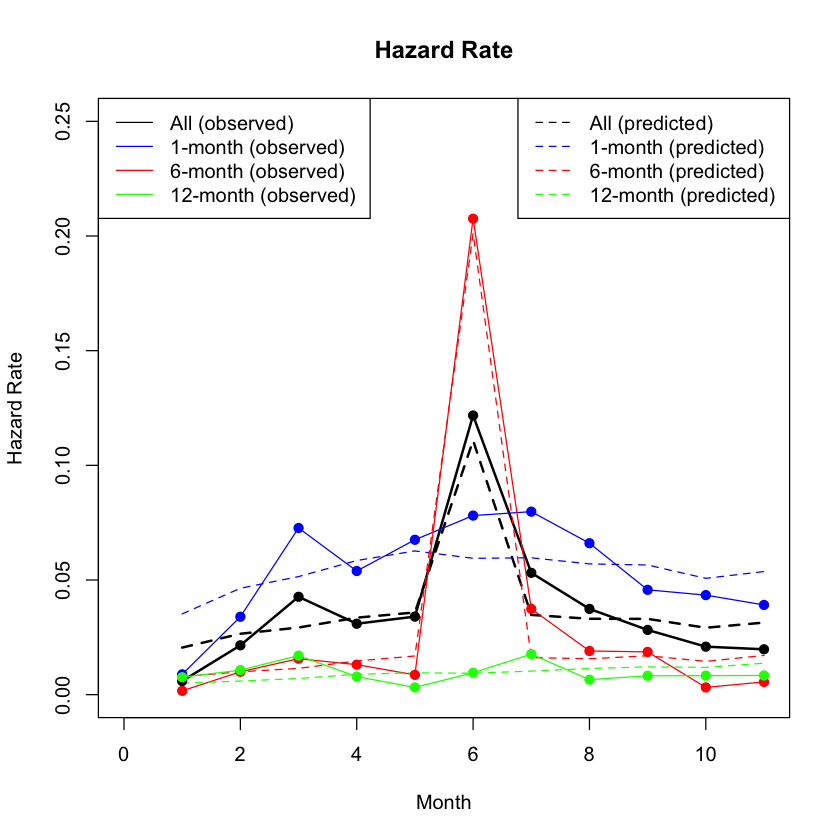

In [50]:
plot(hazard.rate ~ time,data=survival.hazard, 
     type='l', 
     lwd = 2, 
     col = 'black', 
     xlab = "Month", ylab = "Hazard Rate", 
     main = "Hazard Rate",
     ylim=c(0,0.25))
lines(survival.hazard$predicted.hazard.rate ~ survival.hazard$time, lty = 'dashed', lwd =2)

lines(survival.hazard.1$hazard.rate ~ survival.hazard.1$time, col = 'blue')
lines(survival.hazard.1$predicted.hazard.rate ~ survival.hazard.1$time, col = 'blue', lty = 'dashed')

lines(survival.hazard.6$hazard.rate ~ survival.hazard.6$time, col = 'red')
lines(survival.hazard.6$predicted.hazard.rate ~ survival.hazard.6$time, col = 'red', lty = 'dashed')

lines(survival.hazard.12$hazard.rate ~ survival.hazard.12$time, col = 'green')
lines(survival.hazard.12$predicted.hazard.rate ~ survival.hazard.12$time, col = 'green', lty = 'dashed')

legend("topleft", legend = c("All (observed)", "1-month (observed)","6-month (observed)", "12-month (observed)"), 
       lty = 'solid', 
       col = c("black", "blue","red","green"))

legend("topright", legend = c("All (predicted)", "1-month (predicted)","6-month (predicted)", "12-month (predicted)"), 
       lty = 'dashed', 
       col = c("black", "blue","red","green"))

points(survival.hazard$time, survival.hazard$hazard.rate, pch = 19, col = "black")
points(survival.hazard.1$time, survival.hazard.1$hazard.rate, pch = 19, col = "blue")
points(survival.hazard.6$time, survival.hazard.6$hazard.rate, pch = 19, col = "red")
points(survival.hazard.12$time, survival.hazard.12$hazard.rate, pch = 19, col = "green")


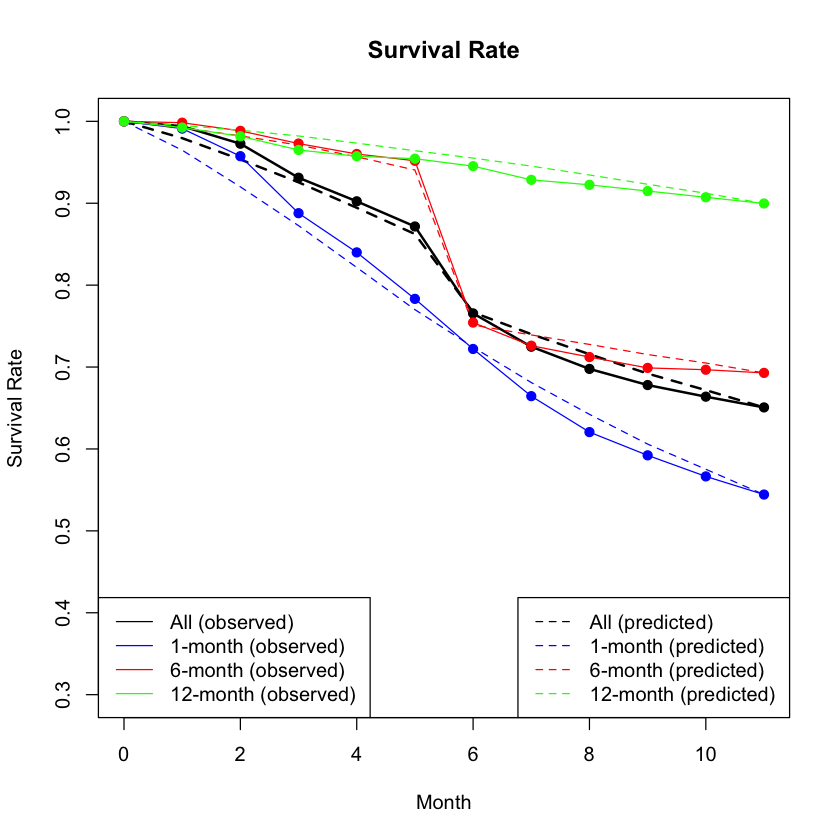

In [51]:
plot(survival.rate ~ time,data=survival.hazard, 
     type='l', lwd = 2, 
     col = 'black', 
     xlab = "Month", ylab = "Survival Rate", 
     main = "Survival Rate",
     ylim=c(0.3,1))
lines(survival.hazard$predicted.survival.rate ~ survival.hazard$time, lty = 'dashed', lwd =2)

lines(survival.hazard.1$survival.rate ~ survival.hazard.1$time, col = 'blue')
lines(survival.hazard.1$predicted.survival.rate ~ survival.hazard.1$time, col = 'blue', lty = 'dashed')

lines(survival.hazard.6$survival.rate ~ survival.hazard.6$time, col = 'red')
lines(survival.hazard.6$predicted.survival.rate ~ survival.hazard.6$time, col = 'red', lty = 'dashed')

lines(survival.hazard.12$survival.rate ~ survival.hazard.12$time, col = 'green')
lines(survival.hazard.12$predicted.survival.rate ~ survival.hazard.12$time, col = 'green', lty = 'dashed')

legend("bottomleft", legend = c("All (observed)", "1-month (observed)","6-month (observed)", "12-month (observed)"), 
       lty = 'solid', 
       col = c("black", "blue","red","green"))

legend("bottomright", legend = c("All (predicted)", "1-month (predicted)","6-month (predicted)", "12-month (predicted)"), 
       lty = 'dashed', 
       col = c("black", "blue","red","green"))

points(survival.hazard$time, survival.hazard$survival.rate, pch = 19, col = "black")
points(survival.hazard.1$time, survival.hazard.1$survival.rate, pch = 19, col = "blue")
points(survival.hazard.6$time, survival.hazard.6$survival.rate, pch = 19, col = "red")
points(survival.hazard.12$time, survival.hazard.12$survival.rate, pch = 19, col = "green")

In [83]:
survival.hazard.1

,time,customers,defected,survival.rate,hazard.rate,clv.1,predict.defected,predict.survived,predicted.hazard.rate,predicted.survival.rate
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,2256,0,1.0000000,NA,5.0000000,0.00000,2256.000,NA,1.0000000
1,1,2236,20,0.9911348,0.008865248,4.5051580,79.47411,2176.526,0.03522788,0.9647721
2,2,2160,76,0.9574468,0.033989267,3.9563918,100.98873,2075.537,0.04639905,0.9200076
3,3,2003,157,0.8878546,0.072685185,3.3352915,106.86612,1968.671,0.05148841,0.8726379
4,4,1895,108,0.8399823,0.053919121,2.8685960,115.14324,1853.528,0.05848780,0.8215992
5,5,1767,128,0.7832447,0.067546174,2.4316666,116.15324,1737.375,0.06266604,0.7701128
6,6,1629,138,0.7220745,0.078098472,2.0379611,103.32178,1634.053,0.05947007,0.7243142
7,7,1499,130,0.6644504,0.079803560,1.7048405,97.51920,1536.534,0.05967935,0.6810876
8,8,1400,99,0.6205674,0.066044029,1.4474963,87.60893,1448.925,0.05701726,0.6422538
